###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause license (c)2015 L.A. Barba, Pi-Yueh Chuang.

# Joukowski Transformation

This is your [_AeroPython_](https://github.com/barbagroup/AeroPython) assignment for the second course module, titled **"Potential vortices and lift."** The first course module, "Building blocks of potential flow" (first three IPython Notebooks of the series) ended with the representation of potential flow around a 2D cylinder by means of superposing a doublet singularity and a free stream. And in the second module, you learned that adding a vortex singularity, you can get lift around the cylinder. You may ask: *is all this useful?*

Here's how it all starts getting useful. Using some simple techniques from complex-variable calculus, we can generate the flow around some airfoils starting with the flow around 2D cylinders. The trick is to use a [*conformal map*](http://en.wikipedia.org/wiki/Conformal_map) (a complex function that preserves angles) to move from the cylinder plane to the airfoil plane.

Let's explore this classic method!

## Introduction

You learned how to construct potential flow over a cylinder via superposition of a free stream and a [doublet](03_Lesson03_doublet.ipynb) singularity. You also learned that adding a vortex can generate [lift on the cylinder](06_Lesson06_vortexLift.ipynb) But what's the big deal? Why is this important to us? What can we do with this potential cylinder flow?

Back in the years when computers were not available, fluid dynamicists and mathematicians used a powerful tool—complex analysis—to study potential flows without directly solving partial-differential governing equations. With the magic of complex analysis and the known solution of potential flow over a cylinder, they could easily obtain many kinds of external potential flows, including flows over several types of airfoils.

Nowadays, though, we no longer use these magical tools. But, not just out of nostalgia, it's still interesting to know the basic concept behind the magic: conformal mappings. In this assignment, we will guide you step by step to obtain potential flow over an airfoil starting with the flow over a cylinder and the famous conformal mapping called the **Joukowski transformation**. You will realize how important potential cylinder flow is in the history of aerodynamics!

Don't worry. We won't talk too much about the mathematics. And you don't have to calculate by hand as the pioneers of aerodynamics did. Just follow the steps and let Python do the heavy lifting.

---

## 1. Complex numbers in Python

Let's start with two complex planes, one defined by points $z = x + iy$, and the other defined by points $\xi = \xi_x+i\xi_y$. The Joukowski transformation takes a point in the $z$-plane and "maps" it to the $\xi$-plane by:

$$
\begin{equation}
\xi = z + \frac{c^2}{z}
\end{equation}
$$

where $c$ is a constant parameter. Before we discuss the Joukowski transformation, let's gain some practice with complex numbers in Python.

Using complex numbers, your function for the Joukowski transformation will look
very simple, and you won't have to calculate the real and imaginary parts separately.

Python (and therefore, NumPy) can deal with complex numbers right out of the box. But the imaginary number, $i=\sqrt{-1}$, is represented by `j`, *not* `i`, to avoid clashes with the common use of `i` in iterations.


If you haven't used them before, try some simple manipulations of complex numbers now. For example, enter the following in a cell block:

```Python
3 + 2j
```

Now try:

```Python
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of the variable is ', type(z))
```

In [2]:
#Erik 4/9/24
#imports
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [3]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (3+3j)
The type of the variable is  <class 'complex'>


### Exercise

Get familiar with complex-number operations in Python by answering the following:

1. $(2.75+3.69i)\times(8.55-6.13i)=$  
2. $1.4\times e^{i5.32}=$  
3. $\frac{7.51-9.15i}{4.43+9.64i}=$

Don't forget to enter your answers on [Open edX](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6226+2017/about).
(Notes: you will need to enter your results with a 2-digit precision after the decimal point in the auto-graded section.)

---

In [4]:
a = 2.75 + 3.69j
b = 8.55 - 6.13j
z = a * b
print(z)

c = 7.51 - 9.15j
d = 4.43 + 9.64j
e = c/d
print(e)



(46.1322+14.692000000000004j)
(-0.4880897698448308-1.0033441577191493j)


## 2. Shapes created by the Joukowski transformation

Start by writing a Python function that takes `z` and `c` as parameters, and returns  the Joukowski transformation of `z`.

We can generate several patterns using Joukowski transforms. Use your Python function to perform the calculations described below and answer the questions.

Just take $c=1$ here for simplicity.


1. On the $z$-plane, place a circle with radius $R$ larger than $c=1$, say $R=1.5$, centered at the origin. What does the shape look like when mapped on the $\xi$-plane?
    1. circle
    2. ellipse
    3. symmetric airfoil
    4. cambered airfoil
2. Now, place a circle on the $z$-plane with radius such that $c \lt R \lt 2c$ (e.g., $c=1$; $R=1.2$), centered at $(x_c,y_c)=(c-R, 0)$. What does the shape look like on the $\xi$-plane?
    1. circle
    2. ellipse
    3. symmetric airfoil
    4. cambered airfoil
3. Put a circle at $(x_c, y_c)=(-\Delta x, \Delta y)$, where $\Delta x$ and $\Delta y$ are small positive numbers, e.g. $\Delta x=0.1$ and $\Delta y=0.1$. The radius $R$ of the circle is $R = \sqrt{(c - x_c)^2 + y_c^2}$. What does the shape on $\xi$-plane look like?
    1. circle
    2. ellipse
    3. symmetric airfoil
    4. cambered airfoil
4. Consider the case when you obtain a symmetric airfoil. In polar coordinates, $(\theta, r=R)$, which point on the circle corresponds to the trailing edge of the airfoil?
    * $\theta=$?

Don't forget to enter your answers on [Open edX](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6226+2017/about).
(Notes: you will need to enter your results with a 2-digit precision after the decimal point in the auto-graded section.)

In [5]:
def jtransform(z, c):
  r = z + c**2 / z

  return r



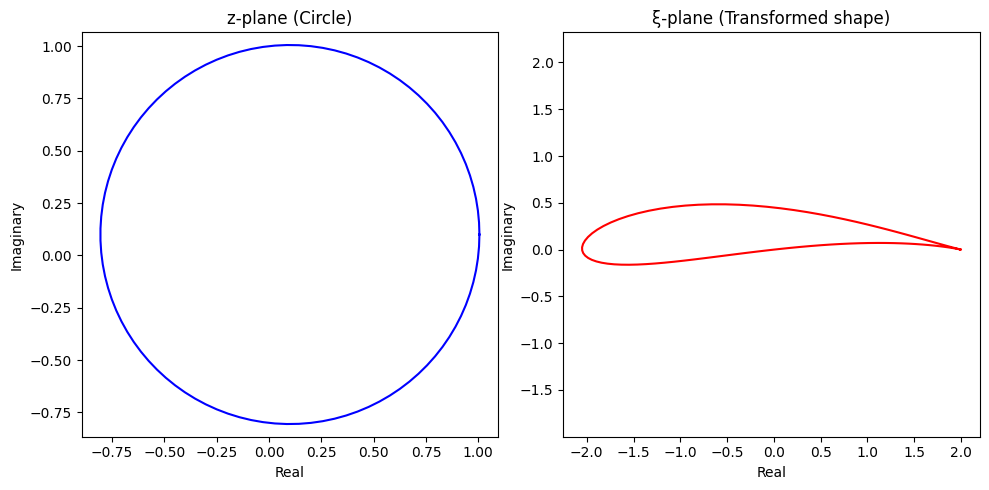

In [13]:
c = 1
#r = 1.1
numPoints = 100
xshift = 0.1
yshift = 0.1
r = math.sqrt((c - (xshift))**2 + yshift**2)

angles = numpy.linspace(0, 2 * math.pi, numPoints)
circle = r * numpy.exp(1j * angles) + xshift + 1j * yshift # create the circle in the z plane


jt = jtransform(circle, c) #transform points using jtransform

# Plot
pyplot.figure(figsize=(10, 5))

# Plot z-plane (circle)
pyplot.subplot(1, 2, 1)
pyplot.plot(circle.real, circle.imag, 'b')
pyplot.title('z-plane (Circle)')
pyplot.xlabel('Real')
pyplot.ylabel('Imaginary')
pyplot.axis('equal')

# Plot ξ-plane (transformed shape)
pyplot.subplot(1, 2, 2)
pyplot.plot(jt.real, jt.imag, 'r')
pyplot.title('ξ-plane (Transformed shape)')
pyplot.xlabel('Real')
pyplot.ylabel('Imaginary')
pyplot.axis('equal')

pyplot.tight_layout()
pyplot.show()



---

## 3. Grid points on the $z$-plane using polar coordinates

By the Joukowski transformation, a point on the $z$-plane corresponds to a point on the $\xi$-plane. As you saw in the previous section, this transformation sometimes gives a shape that looks quite a lot like an airfoil. _What's the use of this?_

It turns out that in complex analysis, when you have a solution to Laplace's equation on the complex plane and apply a [conformal mapping](http://en.wikipedia.org/wiki/Conformal_map), the transformed function is still a solution of the Laplace equation.

This means that we can map the potential function and the streamlines of flow over a cylinder on the $z$-plane to the $\xi$-plane, and obtain the streamlines of flow over an airfoil. The stream function around the airfoil will be given by:

$$
\begin{equation}
\psi(\xi_x, \xi_y) = \psi(\xi_x(x, y), \xi_y(x, y))
\end{equation}
$$

where the complex coordinates of $\xi$, $\xi_x$ and $\xi_y$, are obtained from the Joukowski transformation of $z=x+iy$.

In this exercise, you will obtain the flow over a symmetric Joukowski airfoil with zero and non-zero angle of attack. We obtain the shape of our target airfoil by placing a cylinder centered at $(x_c, y_c)=(-0.15, 0)$ with radius $R = 1.15$ and parameter $c=1$. You'll reach the goal step-by-step with problems (3) to (6).

First, build a set of grid points on the $z$-plane and see how these points look like on the $\xi$-plane. Use polar coordinates to build your grid on the $z$-plane. If you place grid points inside the cylinder, they will end up outside the airfoil after a Joukowski transformation (try it for yourself!). This is a problem. The streamlines inside the cylinder are not physical anyway, so we'll just ignore this region.

### Exercise

1. Build a grid in polar coordinates in the $z$-plane. Use $N_r = 100$ points in the radial direction, within the range $R \le r \le 5$, and $N_\theta = 145$ points in the axial direction, within the range $0 \le \theta \le 2\pi$.
2. Use the Joukowski transformation to map the grid into the $\xi$-plane.
3. Plot the grid points in both planes using the function `pyplot.scatter()`.

You should obtain figures that look like this:

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-3_mesh.png?raw=1"></center>

---

## 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

### Stream function and streamlines

Now, you will evaluate potential flow over the cylinder on the $z$-plane. As mentioned above, $\psi(\xi) = \psi(\xi(z))$. This means that, after evaluating the stream function at a certain point on the $z$-plane, the corresponding point on the $\xi$-plane has the same value of the stream function. We can plot the streamlines on both planes using the function `pyplot.contour()`, because the stream function is a scalar function.

Use $1$ as the free stream velocity, i.e., $U_{\infty}=1$. You have to calculate the strength of the doublet first in order to have a cylinder with radius $R=1.15$.

You should obtain streamline patterns similar to those shown in the following figures.

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-4_streamlines.png?raw=1"></center>

### Velocity vector and pressure coefficient

To get the pressure coefficients, we need to compute the velocity fields.
We can simply obtain the velocity field on the $z$-plane using the coordinates of the grid points on the $z$-plane.
But can we just say that the velocity at the corresponding points on the $\xi$-plane is the same as that on the $z$-plane, just like what we did for the stream function?
_The answer is no._

The values of the stream function remain the same on the original and mapped points because the stream function is a scalar solution of Laplace's equation!

However, the velocity is a vector and is not a solution of Laplace's equation.
When the coordinate system changes by the conformal map, the values of the vector in the new system are different.

Now, let's go back to our problem: the $z$-plane and the $\xi$-plane are two different coordinate systems.
The velocity at a specific point on the $z$-plane is not the same as that at the corresponding point on the $\xi$-plane.
Some manipulation must be done.

We recall that the velocity potential, $\phi$, is also a solution of Laplace's equation; therefore, the potential values remain the same at a point under the conformal transformation.
The same applies to the complex potential, $F(z) = F(\xi(z)) = \phi + i \psi$.

The complex velocity in the $z$-plane is defined by:

$$
\begin{equation}
W_z = \frac{dF}{dz} = u_z - i v_z
\end{equation}
$$

where $u_z = \frac{\partial \psi}{\partial y}$ and $v_z = -\frac{\partial \psi}{\partial x}$.

We can obtain the complex velocity in the $\xi$-plane, $W_\xi = u_\xi - i v_\xi$, by applying a chain rule:

$$
\begin{equation}
W_\xi = \frac{dF}{d\xi} = \frac{dF}{dz} \times \frac{dz}{d\xi} = \frac{dF}{dz} / \frac{d\xi}{dz} = W_z / \frac{d\xi}{dz}
\end{equation}
$$

where

$$
\begin{equation}
\frac{d\xi}{dz} = \frac{d\left(z + \frac{c^2}{z}\right)}{dz} = 1 - \left(\frac{c}{z}\right)^2
\end{equation}
$$

Once we have the velocity fields, we can get the pressure coefficient on each plane.

The velocity field on each plane should look like this (using the function `pyplot.quiver()`):

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-4_velocity.png?raw=1"></center>

The pressure coefficient on each plane should look like this (using the function `pyplot.contourf()`):

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-4_cp.png?raw=1"></center>

### Exercise

* Write the Python code to obtain the figures shown above (streamlines, velocity field, and pressure coefficient in both planes).
* Answer the following questions:
    1. What is the strength of the doublet?
    2. What is the velocity at the $62^\text{nd}$ point on the airfoil surface? (We assume that the trailing edge is the $1^\text{st}$ point and that we index the points counterclockwise.)
    3. What is the minimum value of the pressure coefficient on the airfoil surface?

Don't forget to enter your answers on [Open edX](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6226+2017/about).
(Notes: you will need to enter your results with a 2-digit precision after the decimal point in the auto-graded section.)

---

## 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

Now, we want to place the airfoil at an angle of attack (AoA) with respect to the free stream.
Of course we can use flow over a cylinder and the Joukowski transformation to do this.
*But how?*
Can we superpose a free stream with non-zero inlet angle and a doublet to obtain what we want?
Actually, we can't.
If we do so, we won't be able to obtain a closed streamline, like we did in the previous case (in which a closed circular streamline can be taken as a cylinder surface).

A way to achieve a uniform flow with an inlet angle is by simply rotating the complex plane $z$ to get a new complex plane $z'$, where the $x'$-axis (i.e., real part of $z'$) is parallel to the free-stream direction, with its origin located at the center of the cylinder $\left(x_c, y_c\right)$, as shown in the figure below.

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-5_sketch.png?raw=1" width=400></center>

The relationship between the $z'$-plane and the $z$-plane is:

$$
\begin{equation}
z'=\left[ z-(x_c+iy_c) \right]e^{-i\times AoA}
\end{equation}
$$

i.e.,

$$
\begin{equation}
\left\{
\begin{array}{lcr}
x' & = & (x-x_c)\cos(AoA) + (y-y_c)\sin(AoA) \\
y' & = & - (x-x_c)\sin(AoA) + (y-y_c)\cos(AoA)
\end{array}
\right.
\end{equation}
$$

Now, we can obtain the flow over a cylinder on the new plane $z'$ by adding a free stream with **zero inlet angle** to a doublet **centered at the origin**.
Then, we can obtain the flow on the $z$-plane and, finally, on the $\xi$-plane.
Again, the stream function remains the same at the same point under the three coordinate systems ($z'$, $z$, and $\xi$).

You should get streamlines in the $z$-plane and in the $\xi$-plane that look like this:

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-5_streamlines.png?raw=1"></center>

The velocity vector need to be rotated back from the $z'$-plane to the $z$-plane.

$$
\begin{equation}
W_z = \frac{dF}{dz} = \frac{dF}{dz'} \times \frac{dz'}{dz} = W_{z'} e^{-i \times \text{AoA}}
\end{equation}
$$

Once you have the velocity in the $z$-plane, you can use what you learned in the previous exercise to get the velocity in the $\xi$-plane.

You should get the velocity and pressure coefficient (in the $z$ and $\xi$ planes) that look like this:

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-5_velocity.png?raw=1"></center>
<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-5_cp.png?raw=1"></center>

### Exercise

* Write the Python code to obtain the figures shown above (streamlines, velocity field, and pressure coefficient in the $z$ and $\xi$ planes). Set the angle of attack to $\text{AoA} = 20^\circ$.
* Answer the following questions:
    1. Do you think the flow over the airfoil looks reasonable? Explain why.
    2. What are the index of the stagnation points on the airfoil? (We assume that the trailing edge is the $1^\text{st}$ point and that we index the points counterclockwise.)
    3. How much is the lift? The lift, $L=-\oint p \times \sin{\theta} dA$, is perpendicular to the free-stream direction.
    4. How much is the drag? The drag, $D=-\oint p \times \cos{\theta} dA$, is in the direction of the free-stream.
    5. What is the velocity at the $50^\text{th}$ point on the airfoil?
    6. What is the pressure coefficient at the $75^\text{th}$ point on the airfoil?

Don't forget to enter your answers on [Open edX](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6226+2017/about).
(Notes: you will need to enter your results with a 2-digit precision after the decimal point in the auto-graded section.)

---

## 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

The flow obtained in the last exercise is not physical.
What we need is a **vortex**.
In [Lesson 6](06_Lesson06_vortexLift.ipynb), we saw that, by adding a vortex (i.e., circulation) to a potential flow over a cylinder, we can modify the position of the stagnation points and generate lift.

To make the flow more physical, we need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

This condition helps us in choosing the strength of the vortex to add.
The strength of the vortex should be calculated so that the rear-stagnation point on the cylinder moves from $\theta=\text{AoA}$ to $\theta=0^\circ$ in the $z$-plane.
You should be able to calculate the strength with what you learned in [Lesson 6](06_Lesson06_vortexLift.ipynb).

The streamlines, velocity, and pressure coefficient in the $z$-plane and in the $\xi$-plane should look like this:

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-6_streamlines.png?raw=1"></center>
<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-6_velocity.png?raw=1"></center>
<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/assignment06-6_cp.png?raw=1"></center>

### Exercise

* Write the Python code to obtain the figures shown above (streamlines, velocity field, and pressure coefficient in the $z$ and $\xi$ planes). Set the angle of attack to $\text{AoA} = 20^\circ$.
* Answer the following questions:
    1. What is the strength of the vortex?
    2. How much is the lift and does it agree with the Kutta-Joukowski theorem? The lift, $L=-\oint p \times \sin{\theta} dA$, is perpendicular to the free-stream direction.
    3. How much is the drag? The drag, $D=-\oint p \times \cos{\theta} dA$, is in the direction of the free-stream.
    4. What are the index of the stagnation points on the airfoil? (We assume that the trailing edge is the $1^\text{st}$ point and that we index the points counterclockwise.)
    5. What is the velocity at the $92^\text{nd}$ point on the airfoil?
    6. What is the pressure coefficient at the $111^\text{th}$ point on the airfoil?
    7. Explain what is going on with the pressure coefficient at the trailing edge of the airfoil.

Don't forget to enter your answers on [Open edX](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6226+2017/about).
(Notes: you will need to enter your results with a 2-digit precision after the decimal point in the auto-graded section.)

---

In [7]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')

FileNotFoundError: [Errno 2] No such file or directory: '../styles/custom.css'